In [7]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Atur style visualisasi
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('netflix_titles.csv')

In [8]:
# Tampilkan 5 data teratas
print("5 data teratas:")
print(df.head())


5 data teratas:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 

In [9]:
# ----------------------------
# Feature Engineering
# ----------------------------

# Cek missing values
print("\nMissing values per kolom:")
print(df.isnull().sum())


Missing values per kolom:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [10]:
# Mengisi missing value
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['director'].fillna("No Director", inplace=True)
df['cast'].fillna("No Cast", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['duration'].fillna("Unknown", inplace=True)  # tambahan

# Tangani date_added secara khusus
# Ubah ke datetime, nilai error jadi NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Cek nilai yang gagal diubah
invalid_dates = df[df['date_added'].isna()]
print(f"\nJumlah nilai date_added yang gagal dikonversi: {len(invalid_dates)}")

# Isi nilai kosong dengan tanggal median (bisa disesuaikan)
median_date = df['date_added'].median()
df['date_added'].fillna(median_date, inplace=True)

# Buat fitur tahun & bulan dari date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Feature tambahan: panjang judul
df['title_length'] = df['title'].apply(len)

# Cek ulang missing values
print("\nMissing values setelah diisi:")
print(df.isnull().sum())


Jumlah nilai date_added yang gagal dikonversi: 98

Missing values setelah diisi:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
title_length    0
dtype: int64


<ipython-input-10-4d994b728b03>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0], inplace=True)
<ipython-input-10-4d994b728b03>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

<ipython-input-11-617cefea1049>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


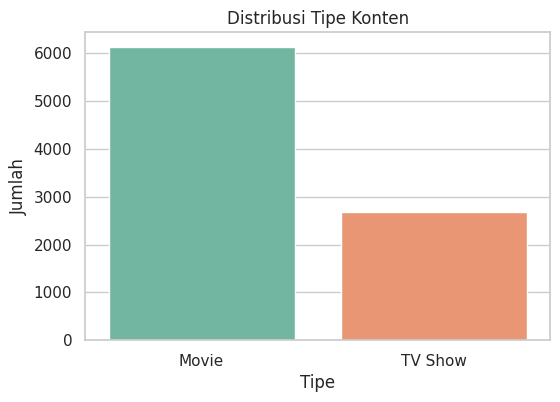

In [11]:
# ----------------------------
# EDA dan Visualisasi Data
# ----------------------------

# 1. Distribusi jenis konten
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribusi Tipe Konten')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.show()

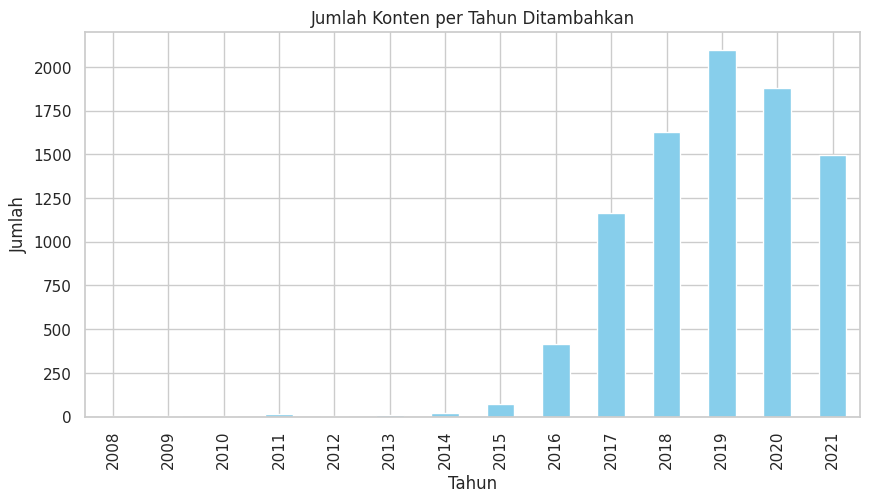

In [12]:
# 2. Jumlah konten berdasarkan tahun penambahan
plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Jumlah Konten per Tahun Ditambahkan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-13-a37f5493d547>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


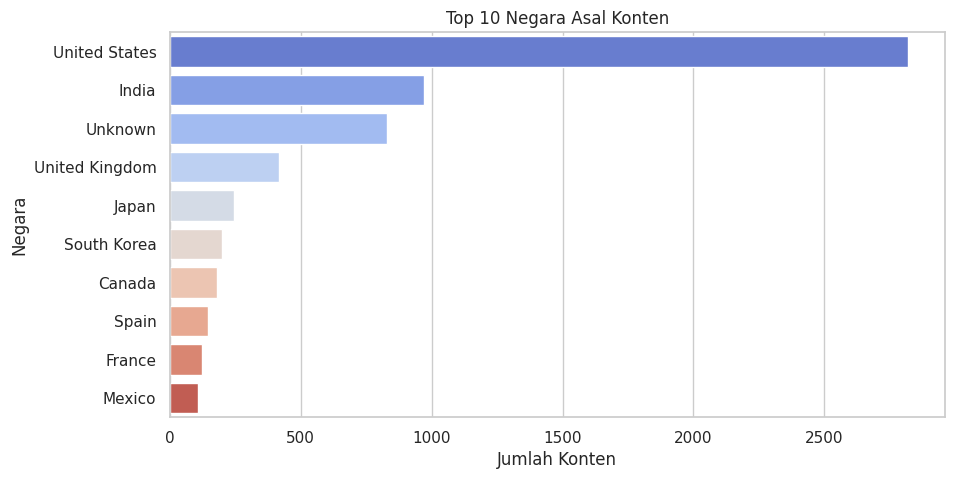

In [13]:
# 3. Top 10 Negara Penyumbang Konten
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Negara Asal Konten')
plt.xlabel('Jumlah Konten')
plt.ylabel('Negara')
plt.show()


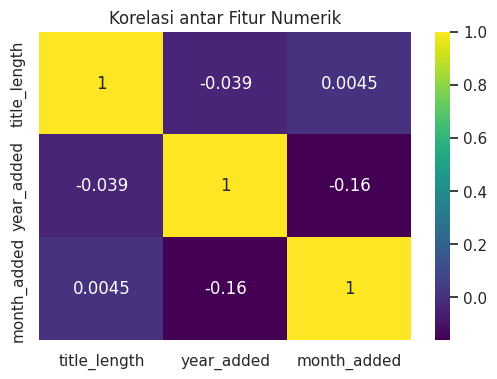

In [14]:
# 4. Korelasi antara fitur numerik
plt.figure(figsize=(6, 4))
sns.heatmap(df[['title_length', 'year_added', 'month_added']].corr(), annot=True, cmap='viridis')
plt.title('Korelasi antar Fitur Numerik')
plt.show()

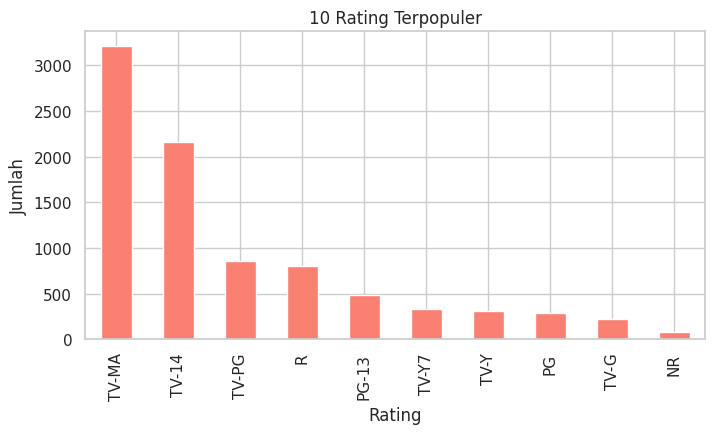

In [15]:
# 5. Rating terbanyak
plt.figure(figsize=(8, 4))
df['rating'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('10 Rating Terpopuler')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-16-eb41c48b7dea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='magma')


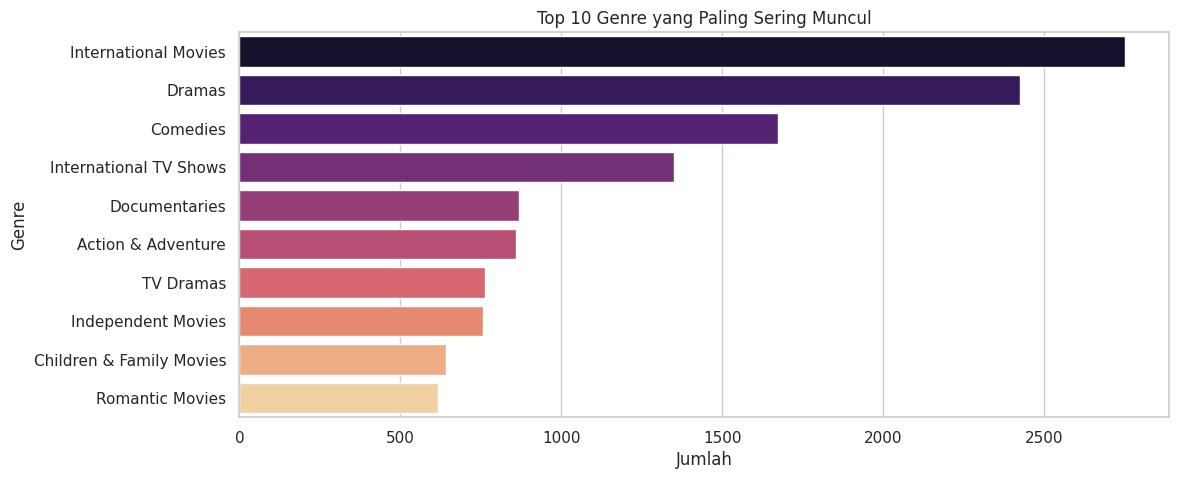

In [16]:
# 6. Jumlah konten berdasarkan genre/jenis
plt.figure(figsize=(12, 5))
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(x=genres.values, y=genres.index, palette='magma')
plt.title('Top 10 Genre yang Paling Sering Muncul')
plt.xlabel('Jumlah')
plt.ylabel('Genre')
plt.show()

## 🧮 Penjelasan Matematika: Korelasi Pearson dalam EDA

Dalam analisis data eksploratif (EDA), kita sering kali ingin mengetahui apakah dua fitur numerik memiliki hubungan atau tidak. Untuk itu, kita menggunakan **koefisien korelasi Pearson**, yaitu ukuran statistik yang mengukur kekuatan dan arah hubungan linier antara dua variabel.

### 📐 Rumus Korelasi Pearson

Koefisien korelasi Pearson dirumuskan sebagai:

$$
\rho_{X,Y} = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2} \cdot \sqrt{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$

atau dalam bentuk umum:

$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

Di mana:
- \( \rho_{X,Y} \): koefisien korelasi Pearson antara variabel \( X \) dan \( Y \)
- \( \text{Cov}(X, Y) \): kovarians antara \( X \) dan \( Y \)
- \( \sigma_X \): standar deviasi dari \( X \)
- \( \sigma_Y \): standar deviasi dari \( Y \)

### 📊 Interpretasi Nilai Korelasi

| Nilai ρ (rho) | Interpretasi                      |
|---------------|-----------------------------------|
| 1.0           | Korelasi positif sempurna         |
| 0.7 - 0.9     | Korelasi positif kuat             |
| 0.4 - 0.6     | Korelasi sedang                   |
| 0.1 - 0.3     | Korelasi lemah                    |
| 0             | Tidak ada korelasi linier         |
| -0.1 - -0.3   | Korelasi negatif lemah            |
| -0.4 - -0.6   | Korelasi negatif sedang           |
| -0.7 - -0.9   | Korelasi negatif kuat             |
| -1.0          | Korelasi negatif sempurna         |

### 🧠 Aplikasi di Dataset Netflix

Dalam dataset `netflix_titles.csv`, kita menggunakan korelasi Pearson untuk mengukur hubungan antara:

- `title_length`: panjang karakter dari judul
- `year_added`: tahun penambahan konten ke Netflix
- `month_added`: bulan penambahan konten

Jika korelasi antara dua fitur bernilai mendekati 0, maka kemungkinan besar hubungan linier di antara keduanya sangat lemah. Korelasi tinggi (positif atau negatif) bisa digunakan untuk fitur seleksi atau pengambilan insight lebih dalam.

---



# 📊 Kesimpulan Hasil EDA Netflix Dataset

1. **Mayoritas konten di Netflix adalah TV Shows dan Movies**, dengan jumlah yang seimbang.
2. **Tahun 2019 dan 2020** merupakan tahun dengan jumlah konten baru tertinggi.
3. **Amerika Serikat** merupakan penyumbang konten terbanyak di Netflix.
4. **Rating paling umum adalah TV-MA dan TV-14**, menunjukkan banyak konten untuk remaja dan dewasa.
5. **Genre yang paling populer** adalah Dramas, International Movies, dan Comedies.
6. Korelasi fitur numerik seperti `title_length`, `year_added`, dan `month_added` **tidak menunjukkan hubungan yang sangat kuat**, artinya hubungan linier antar fitur ini relatif lemah.

EDA membantu memahami distribusi data, tren penambahan konten, preferensi genre, dan informasi penting lainnya sebelum masuk ke tahap modeling machine learning (jika diperlukan).
